# Exercice : classification des feuilles

In [168]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors, metrics
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from numpy import interp

warnings.filterwarnings('ignore')

In [187]:
_FEUILLE = 'Dataset_feuilles_1.csv'

__Ce travail est divisé en quatre parties :__

* Créer une baseline de performances avec le K-NN
* Utiliser le SVM multiclasse avec différents paramètres et l’optimiser
* Une critique et visualisation des performances des modèles sur ce jeu de données
* Une sélection d’un modèle final à partir des performances

# Récupération des données et mise en place

In [185]:
# Récuparation du dataset
data = pd.read_csv(_FEUILLE, sep=",")

# On récupère les features d'un côté...
X = data.copy()
X = X.drop(['species', 'id'], axis=1)  

# et les labels de l'autre
y = data.iloc[:,1] 

# On transforme les noms en valeurs numériques
le = LabelEncoder().fit(y) 
y = le.transform(y)
n_classes = y.shape[0]

# Dispatch en training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [171]:
# Score à optimiser
opt_score = 'accuracy'

# Baseline : Knn avec un gridsearch

In [172]:
# Modèle à utiliser = KNeighborsClassifier()
model = neighbors.KNeighborsClassifier()

# Toutes les valeurs à tester
axe_X = range(2,20)
param_grid = {'n_neighbors':axe_X }

# Création de la gridsearch puis fit sur les données à entrainer
knn = model_selection.GridSearchCV(model, param_grid, cv=10, scoring=opt_score, refit=True)
knn.fit(X_train, y_train)

# Sauvegarde des meilleurs résultats
best_params = knn.best_params_
score = knn.best_score_

# Affichage
score_knn = []
for a, c in zip(knn.cv_results_['mean_test_score'], knn.cv_results_['params']):
    print("\t%s %s %s pour %s" % ('\tSCORE\t',  "Accuracy" , round(a,4), c))
    score_knn.append(abs(a))

# List --> Dataframe
score_knn = pd.DataFrame(score_knn)

# Affichage des meilleurs résultats
print('\n\t\t%s\t%f' % (str(best_params), abs(score)))

		SCORE	 Accuracy 0.8611 pour {'n_neighbors': 2}
		SCORE	 Accuracy 0.8699 pour {'n_neighbors': 3}
		SCORE	 Accuracy 0.8561 pour {'n_neighbors': 4}
		SCORE	 Accuracy 0.8359 pour {'n_neighbors': 5}
		SCORE	 Accuracy 0.8308 pour {'n_neighbors': 6}
		SCORE	 Accuracy 0.8245 pour {'n_neighbors': 7}
		SCORE	 Accuracy 0.803 pour {'n_neighbors': 8}
		SCORE	 Accuracy 0.7841 pour {'n_neighbors': 9}
		SCORE	 Accuracy 0.7664 pour {'n_neighbors': 10}
		SCORE	 Accuracy 0.7386 pour {'n_neighbors': 11}
		SCORE	 Accuracy 0.726 pour {'n_neighbors': 12}
		SCORE	 Accuracy 0.7197 pour {'n_neighbors': 13}
		SCORE	 Accuracy 0.7083 pour {'n_neighbors': 14}
		SCORE	 Accuracy 0.6907 pour {'n_neighbors': 15}
		SCORE	 Accuracy 0.6768 pour {'n_neighbors': 16}
		SCORE	 Accuracy 0.6654 pour {'n_neighbors': 17}
		SCORE	 Accuracy 0.6667 pour {'n_neighbors': 18}
		SCORE	 Accuracy 0.6515 pour {'n_neighbors': 19}

		{'n_neighbors': 3}	0.869949


# SVM Multiclasse avec différents paramètres
# 1er test : Linear Support Vector Classification

In [173]:
# Modèle à utiliser = LinearSVC()
model = LinearSVC()

# Toutes les valeurs à tester
params = { 'C': np.logspace(-1, 4, 6) }

# Création de la gridsearch puis fit sur les données à entrainer
lsvc = GridSearchCV(model, params, cv=10, scoring=opt_score, refit=True)
lsvc.fit(X_train, y_train)

# Sauvegarde des meilleurs résultats
best_params = lsvc.best_params_
score = lsvc.best_score_

# Affichage
score_lsvc = []
for a, c in zip(lsvc.cv_results_['mean_test_score'], lsvc.cv_results_['params']):
    print("\t%s %s %s pour %s" % ('\tSCORE\t',  "Accuracy" , round(a,4), c))
    score_lsvc.append(abs(a))

# List --> Dataframe
score_lsvc = pd.DataFrame(score_lsvc)

# Affichage des meilleurs résultats
print('\n\t\t%s\t%f' % (str(best_params), abs(score)))

		SCORE	 Accuracy 0.5518 pour {'C': 0.10000000000000001}
		SCORE	 Accuracy 0.8283 pour {'C': 1.0}
		SCORE	 Accuracy 0.9407 pour {'C': 10.0}
		SCORE	 Accuracy 0.9558 pour {'C': 100.0}
		SCORE	 Accuracy 0.9545 pour {'C': 1000.0}
		SCORE	 Accuracy 0.9533 pour {'C': 10000.0}

		{'C': 100.0}	0.955808


# 2nd test : C-Support Vector Classification

In [174]:
# Modèle à utiliser = SVC()
model = SVC()

# Toutes les valeurs à tester
params = { 'C': np.logspace(1, 6, 6) }

# Création de la gridsearch puis fit sur les données à entrainer
svc = GridSearchCV(model, params, cv=10, scoring=opt_score, refit=True)
svc.fit(X_train, y_train)

# Sauvegarde des meilleurs résultats
best_params = svc.best_params_
score = svc.best_score_

# Affichage
score_svc = []
for a, c in zip(svc.cv_results_['mean_test_score'], svc.cv_results_['params']):
    print("\t%s %s %s pour %s" % ('\tSCORE\t',  "Accuracy" , round(a,4), c))
    score_svc.append(abs(a))
        
# List --> Dataframe
score_svc = pd.DataFrame(score_svc)

# Affichage des meilleurs résultats
print('\n\t\t%s\t%f' % (str(best_params), abs(score)))

		SCORE	 Accuracy 0.1263 pour {'C': 10.0}
		SCORE	 Accuracy 0.1856 pour {'C': 100.0}
		SCORE	 Accuracy 0.822 pour {'C': 1000.0}
		SCORE	 Accuracy 0.9343 pour {'C': 10000.0}
		SCORE	 Accuracy 0.9343 pour {'C': 100000.0}
		SCORE	 Accuracy 0.9343 pour {'C': 1000000.0}

		{'C': 10000.0}	0.934343


In [175]:
y_pred = knn.predict(X_test)
print("Accuracy knn : %.2f" % metrics.accuracy_score(y_test, y_pred))
print("F1 : %.2f" % metrics.f1_score(y_test, y_pred, average='weighted'))

y_pred = lsvc.predict(X_test)
print("Accuracy lsvc : %.2f" % metrics.accuracy_score(y_test, y_pred))
print("F1 : %.2f" % metrics.f1_score(y_test, y_pred, average='weighted'))

y_pred = svc.predict(X_test)
print("Accuracy svc : %.2f" % metrics.accuracy_score(y_test, y_pred))
print("F1 : %.2f" % metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy knn : 0.82
F1 : 0.82
Accuracy lsvc : 0.92
F1 : 0.92
Accuracy svc : 0.91
F1 : 0.91


Le meilleur résultat est obtenu pour le Linear SVC, puis le SVC et enfin la baseline définie avec le knn. Nous allons donc visualer ces résultats sous forme de graphique, en appliquant les trois méthodes.

Nous gardons les meilleurs paramètres.

# Visualiation des résultats sous forme de graphique

In [176]:
# Binarize the output
y = label_binarize(y, classes=range(0, 100))
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

plt.figure(figsize=(10, 8))

In [177]:
model = svm.SVC(C = 100)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(model)
y_score_svc = classifier.fit(X_train, y_train).decision_function(X_test)

In [178]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(model)
y_score_knn = classifier.fit(X_train, y_train).predict(X_test)

In [179]:
model = svm.LinearSVC(C = 100000)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(model)
y_score_lsvc = classifier.fit(X_train, y_train).decision_function(X_test)

In [180]:
# Sauvegarde des scores
all_score = [y_score_svc, y_score_knn, y_score_lsvc]
noms = ['SVC', 'knn', 'Linear SVC']
colors = ['blue', 'red', 'green']

In [181]:
for y_score, name, color in zip(all_score, noms, colors):  
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    # Plot all ROC curves
    plt.plot(fpr["micro"], tpr["micro"],
             label=name + ' average ROC = {0:0.3f}'
                   ''.format(roc_auc["micro"]),
             color=color, linestyle=':', linewidth=2)

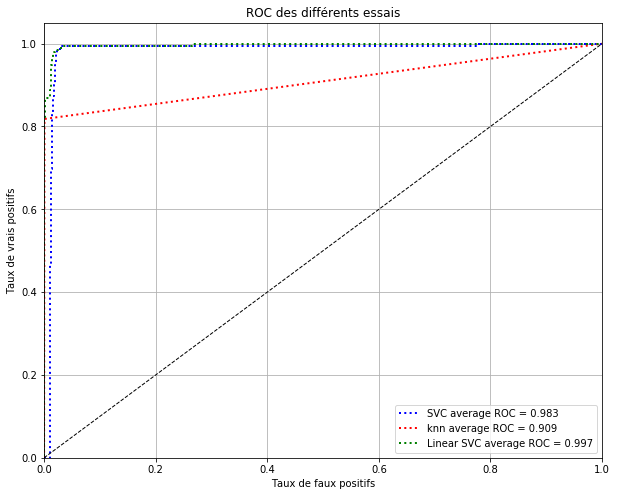

In [182]:
# caractèristiques des figures
plt.grid('on')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('ROC des différents essais')
plt.legend(loc="lower right")
plt.show()

Les résultats sont identiques à ceux trouvés un peu plus haut.